In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #arvore de decisao
from sklearn.metrics import accuracy_score



## Extracción de datos desde MySQL
Los datos se extrajeron desde varias tablas relacionales utilizando JOINs y se exportaron a un archivo .csv.

In [ ]:
df=pd.read_csv('ProductosFacturaDetalle.csv')
df.isnull().sum()

df["ProductoNombre"] = df["ProductoNombre"].replace({
    "Wimmers gute Semmelkn�del": "Wimmers gute Semmelknödel",
    "Original Frankfurter gr�ne So�e": "Original Frankfurter grüne Soße",
    "R�ssle Sauerkraut":"Rössle Sauerkraut", 
    "NuNuCa Nui�-Nougat-Creme": "NuNuCa Nuß-Nougat-Creme",
    "Gumbi�r Gummibi�rchen": "Gumbär Gummibärchen",
    "R�d Kaviar":"Röd Kaviar",
    "Th�ringer Rostbratwurst": "Thüringer Rostbratwurst",
    "Ci�te de Blaye":"Côte de Blaye",
    "Rh�nbr�u Klosterbier": "Rhönbräu Klosterbier",
    "Tourti�re":"Tourtière",
    "Pi�zi� chinois":	"Pâtes chinois",
    "Sirop d�rable":"Sirop dérable",
    "Lakkalik��ri":	"Lakkalikööri"
})
df

,FacturaID,ProductoID,PrecioUnitario,Cantidad,Descuento,ProductoID.1,ProductoNombre,ProveedorID,CategoriaID,CantidadPorUnidad,PrecioUnitario.1,UnidadesStock,UnidadesPedidas,NivelReorden,Discontinuado
0,10300,66,13.6,30,0.00,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.0,4,100,20,0
1,10442,66,13.6,60,0.00,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.0,4,100,20,0
2,10475,66,13.6,60,0.15,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.0,4,100,20,0
3,10493,66,13.6,10,0.10,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.0,4,100,20,0
4,10532,66,17.0,24,0.00,66,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.0,4,100,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11000,77,13.0,30,0.00,77,Original Frankfurter grüne Soße,12,2,12 boxes,13.0,32,0,15,0
2151,11015,77,13.0,18,0.00,77,Original Frankfurter grüne Soße,12,2,12 boxes,13.0,32,0,15,0
2152,11060,77,13.0,10,0.00,77,Original Frankfurter grüne Soße,12,2,12 boxes,13.0,32,0,15,0
2153,11068,77,13.0,28,0.15,77,Original Frankfurter grüne Soße,12,2,12 boxes,13.0,32,0,15,0


## Limpieza de texto en nombres de productos
Corregimos caracteres dañados con `replace` para evitar inconsistencias en los agrupamientos por nombre de producto.

In [102]:
df.describe()

,FacturaID,ProductoID,PrecioUnitario,Cantidad,Descuento,ProductoID.1,ProveedorID,CategoriaID,PrecioUnitario.1,UnidadesStock,UnidadesPedidas,NivelReorden,Discontinuado
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.0
mean,10659.375870,40.793039,26.218520,23.812993,0.056167,40.793039,14.488167,4.135499,27.948687,39.795824,8.074246,11.900232,0.0
std,241.378032,22.159019,29.827418,19.022047,0.083450,22.159019,8.228640,2.378567,31.610706,36.055668,19.748983,10.791421,0.0
min,10248.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.0
25%,10451.000000,22.000000,12.000000,10.000000,0.000000,22.000000,7.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.0
50%,10657.000000,41.000000,18.400000,20.000000,0.000000,41.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.0
75%,10862.500000,60.000000,32.000000,30.000000,0.100000,60.000000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.0
max,11077.000000,77.000000,263.500000,130.000000,0.250000,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,0.0


In [13]:
print("Descripcion Estadistica ProductoNombre:")
print(df['ProductoNombre'].describe())

Descripcion Estadistica ProductoNombre:
count                     2155
unique                      77
top       Raclette Courdavault
freq                        54
Name: ProductoNombre, dtype: object


In [4]:
print("informacion del dataset:")
print(df.info())

informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FacturaID          2155 non-null   int64  
 1   ProductoID         2155 non-null   int64  
 2   PrecioUnitario     2155 non-null   float64
 3   Cantidad           2155 non-null   int64  
 4   Descuento          2155 non-null   float64
 5   ProductoID.1       2155 non-null   int64  
 6   ProductoNombre     2155 non-null   object 
 7   ProveedorID        2155 non-null   int64  
 8   CategoriaID        2155 non-null   int64  
 9   CantidadPorUnidad  2155 non-null   object 
 10  PrecioUnitario.1   2155 non-null   float64
 11  UnidadesStock      2155 non-null   int64  
 12  UnidadesPedidas    2155 non-null   int64  
 13  NivelReorden       2155 non-null   int64  
 14  Discontinuado      2155 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usag

In [14]:
print("Conteo de valores unicos:")
print(df['ProductoNombre'].value_counts())

Conteo de valores unicos:
ProductoNombre
Raclette Courdavault         54
Guaraná Fantástica           51
Camembert Pierrot            51
Gorgonzola Telino            51
Gnocchi di nonna Alice       50
                             ..
Louisiana Hot Spiced Okra     8
Gravad lax                    6
Chocolade                     6
Genen Shouyu                  6
Mishi Kobe Niku               5
Name: count, Length: 77, dtype: int64


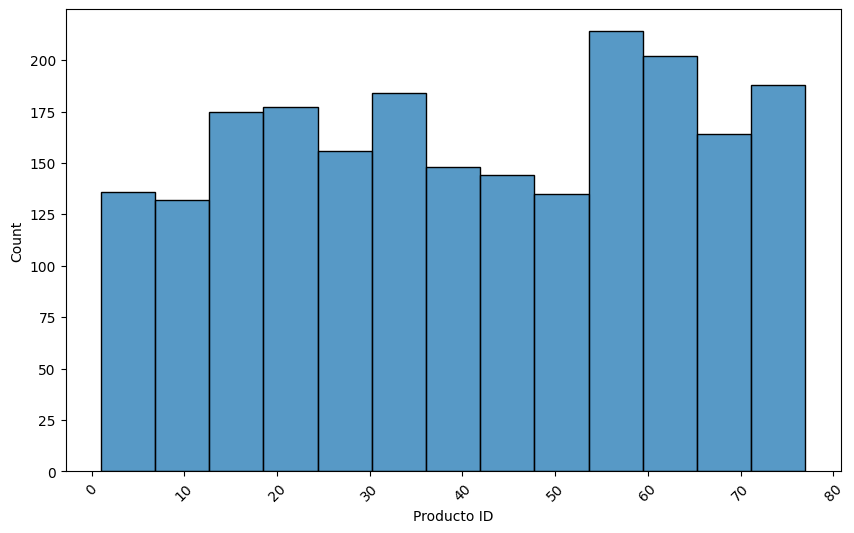

In [134]:
plt.figure(figsize=(10,6))
sns.histplot(df["ProductoID"])
plt.xlabel('Producto ID')
plt.xticks(rotation=45)
plt.show()

In [51]:
df["ProductoID"].value_counts()


ProductoID
59    54
24    51
60    51
31    51
56    50
      ..
66     8
37     6
48     6
15     6
9      5
Name: count, Length: 77, dtype: int64

In [63]:
colunmas=["ProductoID","ProductoNombre"]
df2=df[colunmas]
df2

,ProductoID,ProductoNombre
0,66,Louisiana Hot Spiced Okra
1,66,Louisiana Hot Spiced Okra
2,66,Louisiana Hot Spiced Okra
3,66,Louisiana Hot Spiced Okra
4,66,Louisiana Hot Spiced Okra
...,...,...
2150,77,Original Frankfurter grüne Soße
2151,77,Original Frankfurter grüne Soße
2152,77,Original Frankfurter grüne Soße
2153,77,Original Frankfurter grüne Soße


In [3]:
#padronizando columnas

colunas = ["PrecioUnitario", "Cantidad", "Descuento", "UnidadesStock", "UnidadesPedidas"]

scaler = StandardScaler()
df_z = pd.DataFrame(scaler.fit_transform(df[colunas]), columns=[col + "_z" for col in colunas])
df_z.head()


,PrecioUnitario_z,Cantidad_z,Descuento_z,UnidadesStock_z,UnidadesPedidas_z
0,-0.423149,0.325330,-0.673216,-0.993024,4.655789
1,-0.423149,1.902813,-0.673216,-0.993024,4.655789
2,-0.423149,1.902813,1.124679,-0.993024,4.655789
3,-0.423149,-0.726326,0.525380,-0.993024,4.655789
4,-0.309134,0.009833,-0.673216,-0.993024,4.655789


## Estandarización con Z-score
Utilizamos `StandardScaler` para normalizar variables como cantidad, precio y descuento. Esto facilita la identificación de outliers.

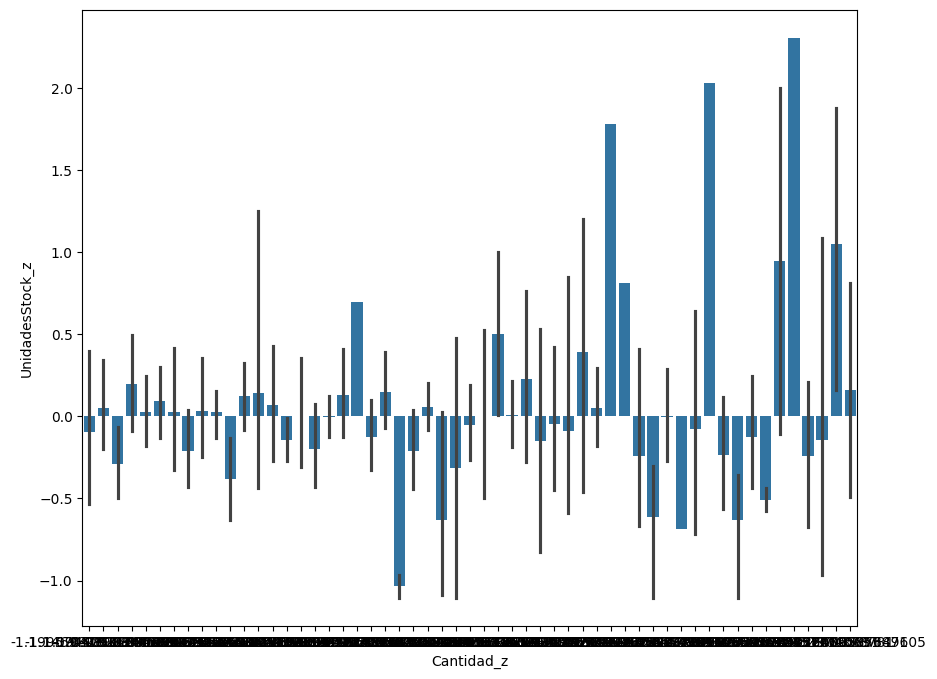

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_z, x="Cantidad_z", y="UnidadesStock_z")
plt.show()

<Figure size 1000x800 with 0 Axes>

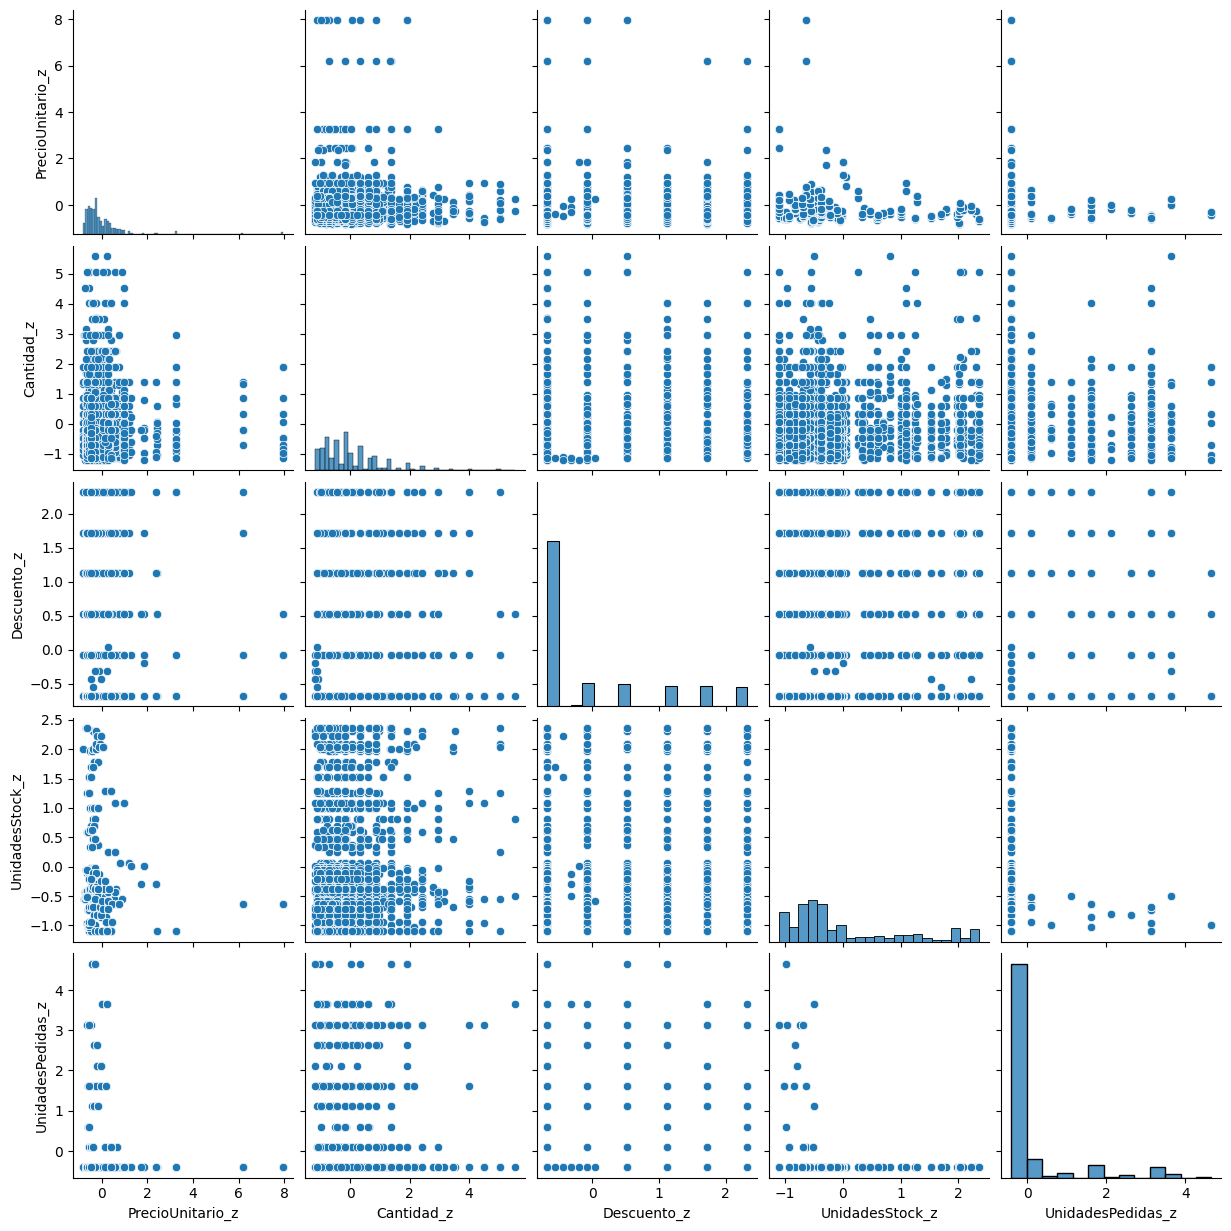

In [13]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_z)
plt.show()

In [39]:
df_z[abs(df_z["Cantidad_z"]) > 3]


,PrecioUnitario_z,Cantidad_z,Descuento_z,UnidadesStock_z,UnidadesPedidas_z
36,0.235794,5.583608,-0.673216,-0.493680,3.642843
110,-0.560639,4.006125,1.124679,-0.965282,3.136370
112,-0.560639,4.531952,-0.673216,-0.965282,3.136370
185,-0.242066,4.006125,2.323275,-0.632386,1.616952
480,-0.678007,3.164800,1.124679,-0.438197,-0.408939
576,0.428614,4.006125,-0.673216,-1.103989,-0.408939
745,-0.728308,4.531952,-0.673216,-0.549162,-0.408939
814,0.592930,5.057780,-0.673216,0.255336,-0.408939
933,-0.409736,3.480297,-0.073918,1.975298,-0.408939
938,-0.396322,4.006125,-0.673216,-0.549162,-0.408939


## Detección de outliers
Filtramos valores con Z-score absoluto mayor que 3 para analizar comportamientos extremos en la columna `Cantidad`.

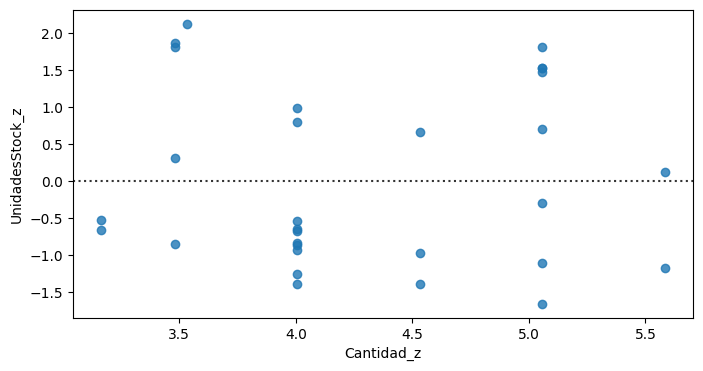

In [48]:
plt.figure(figsize=(8,4))
sns.residplot(data=df_z[abs(df_z["Cantidad_z"]) > 3], x="Cantidad_z", y="UnidadesStock_z")
plt.show()

	Analisamos la relación absoluta de cantidad por de unidades en stock usando residplot.

In [ ]:
#AQUI EMPEZAMOS OUTRA ANALISIS.

In [15]:
df2=pd.read_csv("ProductosFacturaEnvios.csv")
df2["ProductoNombre"] = df2["ProductoNombre"].replace({
    "Wimmers gute Semmelkn�del": "Wimmers gute Semmelknödel",
    "Original Frankfurter gr�ne So�e": "Original Frankfurter grüne Soße",
    "R�ssle Sauerkraut":"Rössle Sauerkraut", 
    "NuNuCa Nui�-Nougat-Creme": "NuNuCa Nuß-Nougat-Creme",
    "Gumbi�r Gummibi�rchen": "Gumbär Gummibärchen",
    "R�d Kaviar":"Röd Kaviar",
    "Th�ringer Rostbratwurst": "Thüringer Rostbratwurst",
    "Ci�te de Blaye":"Côte de Blaye",
    "Rh�nbr�u Klosterbier": "Rhönbräu Klosterbier",
    "Tourti�re":"Tourtière",
    "Pi�zi� chinois":	"Pâtes chinois",
    "Sirop d�rable":"Sirop dérable",
    "Lakkalik��ri":	"Lakkalikööri"})
df2

,ProductoID,Cantidad,Descuento,FechaFactura,FechaEnvio,PaisEnvio,ProductoNombre,UnidadesStock
0,11,45,0.20,8/20/1996 0:00,8/26/1996 0:00,Germany,Chai,39
1,42,18,0.00,8/30/1996 0:00,9/5/1996 0:00,USA,Chai,39
2,72,20,0.00,9/30/1996 0:00,10/10/1996 0:00,USA,Chai,39
3,14,15,0.15,11/7/1996 0:00,11/15/1996 0:00,Germany,Chai,39
4,51,12,0.00,11/14/1996 0:00,11/20/1996 0:00,Mexico,Chai,39
...,...,...,...,...,...,...,...,...
2150,64,30,0.00,4/6/1998 0:00,4/14/1998 0:00,USA,Original Frankfurter grüne Soße,32
2151,66,18,0.00,4/10/1998 0:00,4/20/1998 0:00,Norway,Original Frankfurter grüne Soße,32
2152,73,10,0.00,4/30/1998 0:00,5/4/1998 0:00,Italy,Original Frankfurter grüne Soße,32
2153,75,28,0.15,5/4/1998 0:00,0000-00-00 00:00:00,Brazil,Original Frankfurter grüne Soße,32


## Limpieza de texto en nombres de productos
Corregimos caracteres dañados con `replace` para evitar inconsistencias en los agrupamientos por nombre de producto.

In [146]:
prod=df2.groupby('ProductoNombre')['Cantidad'].sum().sort_values(ascending=False)
prod

ProductoNombre
Camembert Pierrot            1577
Raclette Courdavault         1496
Gorgonzola Telino            1397
Gnocchi di nonna Alice       1263
Pavlova                      1158
                             ... 
Laughing Lumberjack Lager     184
Chocolade                     138
Gravad lax                    125
Genen Shouyu                  122
Mishi Kobe Niku                95
Name: Cantidad, Length: 77, dtype: int64

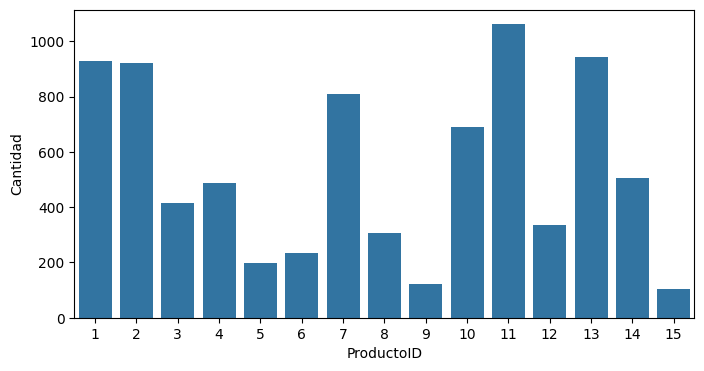

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(df2.groupby('ProductoID')['Cantidad'].sum().head(15))
plt.show()

	Analisamos la relación de cantidad de producto usando barplot.

In [ ]:
df2.pivot_table('ProductoID',index='Descuento')

,ProductoID
Descuento,
0.00,40.769932
0.01,5.000000
0.02,41.500000
0.03,29.333333
0.04,72.000000
0.05,41.681081
0.06,18.000000
0.10,39.549133
0.15,41.407643


In [ ]:
df2["ProductoID"].value_counts()

#producto 59 es el que más vendió y fue vendido 54 veces y el 9 el que menos se vendio, solo 5 veces.

ProductoID
59    54
31    51
60    51
24    51
56    50
      ..
66     8
37     6
15     6
48     6
9      5
Name: count, Length: 77, dtype: int64

<Figure size 1000x600 with 0 Axes>

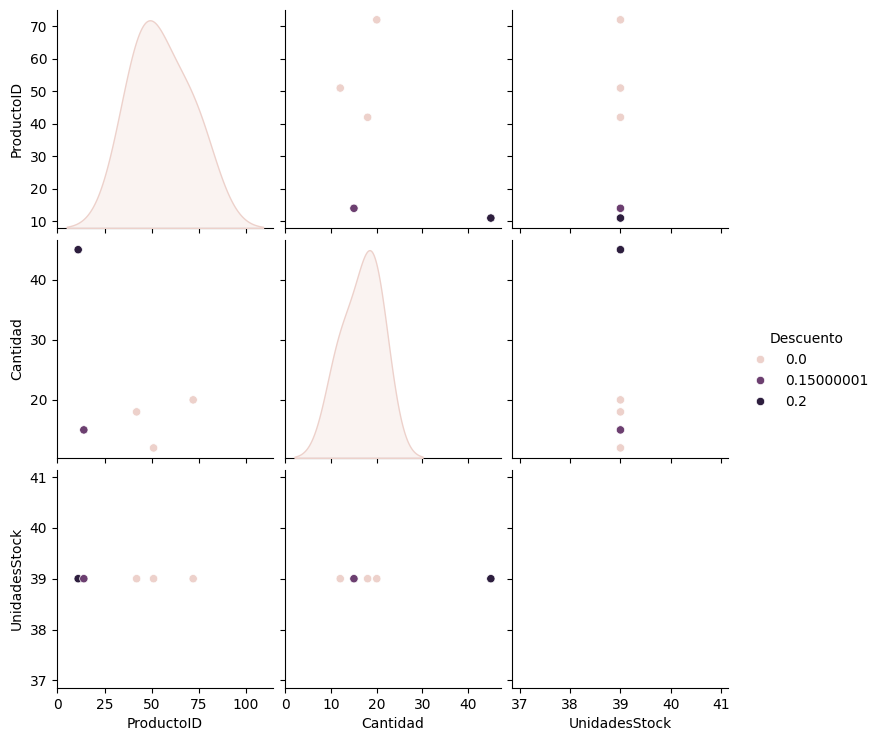

In [27]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df2.head(), hue='Descuento')
plt.xlabel('Producto ID')
plt.xticks(rotation=45)
plt.show()

	Analisamos la relación entre todo el dataframe(df2) usando como variavel el Descuento de compra usando pairplot

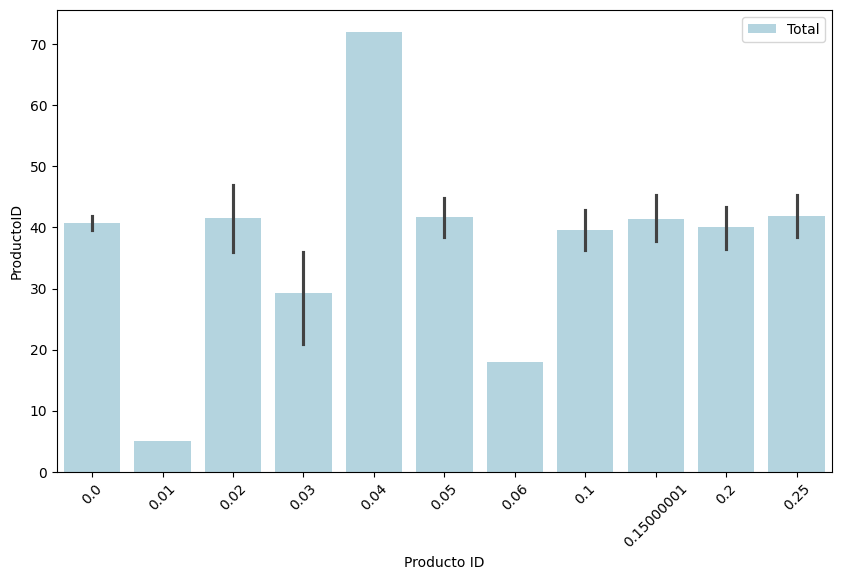

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x="Descuento", y="ProductoID", data=df2, label="Total", color="lightblue")
plt.xlabel('Producto ID')
plt.xticks(rotation=45)
plt.show()

	Analisamos la relación entre descuentos para cada producto de compra usando Barplot

In [ ]:
df2["FechaEnvio"] = pd.to_datetime(df2["FechaEnvio"], errors="coerce")
df2["FechaFactura"] = pd.to_datetime(df2["FechaFactura"], errors="coerce")

## Conversión de fechas y creación de columna derivada
Convertimos `FechaFactura` y `FechaEnvio` al tipo datetime y creamos la columna `DiasHastaEnvio` para medir el tiempo entre la factura y el envío.

In [ ]:
df2["dias"] = (pd.to_datetime(df2["FechaEnvio"], errors="coerce") - pd.to_datetime(df2["FechaFactura"], errors="coerce")).dt.days
df2["dias"]

0     6.0
1     6.0
2    10.0
3     8.0
4     6.0
Name: dias, dtype: float64

In [92]:
df2["dias"].value_counts()

dias
7.0     271
6.0     241
3.0     187
9.0     184
5.0     177
4.0     176
8.0     174
2.0     149
10.0    129
12.0     45
1.0      43
11.0     34
19.0     23
21.0     20
29.0     19
18.0     19
13.0     17
23.0     15
32.0     15
15.0     14
34.0     13
20.0     13
25.0     13
35.0     12
14.0     12
24.0     11
30.0     11
17.0     11
22.0     11
28.0      8
26.0      5
27.0      4
31.0      3
37.0      2
16.0      1
Name: count, dtype: int64

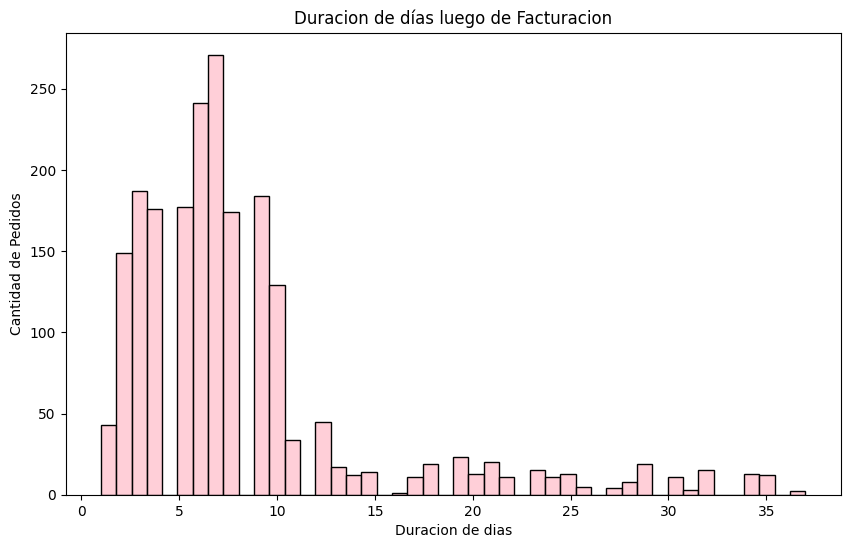

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(df2["dias"], color='pink')
plt.title("Duracion de días luego de Facturacion")
plt.xlabel("Duracion de dias")
plt.ylabel("Cantidad de Pedidos")
plt.show()

	Analisamos la relación entre Dias de entrega desde facturación de compra usando Histplot

In [55]:
df_clean = df.copy()
df2_clean=df2.copy()
df_clean["Cantidad_z"] = df_z["Cantidad_z"]
df_clean["PrecioUnitario_z"] = df_z["PrecioUnitario_z"]
df_clean["Descuento_z"] = df_z["Descuento_z"]

In [56]:
df_clean.to_csv("df_final_limpio.csv", index=False)
df2_clean.to_csv("df2_final_limpio.csv", index=False)

## Exportación final
Guardamos la base limpia con `df_clean.to_csv("df_final.csv")` para su uso en futuros análisis.